### Part 2: Programming Problems

#### Problem 1: Bell Curve Fitting
##### (1) Import dataset1.csv

Import the file `dataset1.csv` (100 rows, 2 columns) using `np.loadtxt` with `skiprows=2` and `delimiter=","`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Import dataset1.csv
data1 = np.loadtxt('dataset1.csv', skiprows=2, delimiter=",")
# First column: z, Second column: y
z_data = data1[:, 0]
y_data = data1[:, 1]
N = data1.shape[0]
print("Dataset1 shape:", data1.shape)

Dataset1 shape: (100, 2)


##### (2) Plot the Point Cloud

Plot the data points with the first column on the x-axis and the second column on the y-axis.

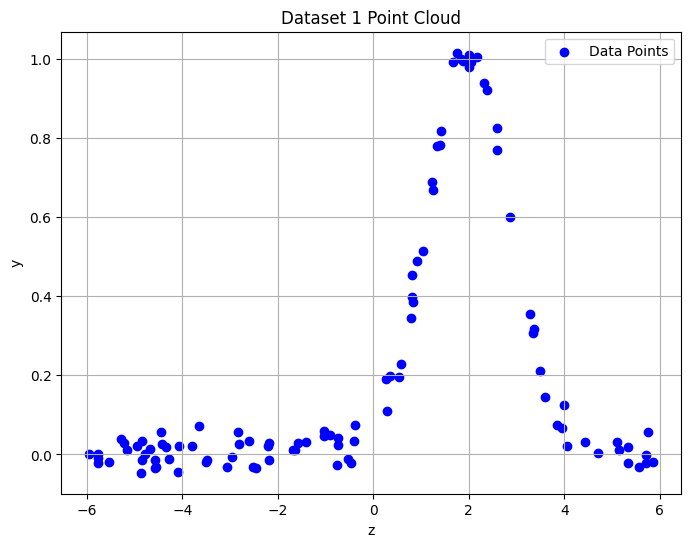

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(z_data, y_data, color='blue', label='Data Points')
plt.xlabel('z')
plt.ylabel('y')
plt.title('Dataset 1 Point Cloud')
plt.legend()
plt.grid(True)
plt.show()

##### (3) Define Model and Objective Function

Define the bell curve model:
$$
m(z;x) = \exp\Bigl(-\frac{(z - x_1)^2}{x_2}\Bigr)
$$
and the mean squared error objective:
$$
f(x) = \frac{1}{N} \sum_{i=1}^{N} \Bigl(m(z_i;x) - y_i\Bigr)^2.
$$

Evaluate $ f(x) $ at $ x = (1,0.5) $ and $ x = (0.5,1) $.

In [4]:
def bell_model(z, x):
    # x[0]: center, x[1]: width parameter
    return np.exp(-((z - x[0])**2) / x[1])

def objective(x, z, y):
    m = bell_model(z, x)
    return np.mean((m - y)**2)

# Evaluate objective at two sample parameter values:
print("f([1, 0.5]) =", objective([1, 0.5], z_data, y_data))
print("f([0.5, 1]) =", objective([0.5, 1], z_data, y_data))

f([1, 0.5]) = 0.11204289613814822
f([0.5, 1]) = 0.15009253657239355


##### (4) Show the Gradient of f

We want to show that the gradient is given by:
$$
\nabla f(x) = \frac{2}{N}\sum_{i=1}^{N} \Bigl(m(z_i;x)-y_i\Bigr)
\begin{pmatrix}
-\frac{\partial m(z_i;x)}{\partial x_1} \\
-\frac{\partial m(z_i;x)}{\partial x_2}
\end{pmatrix},
$$
with
$$
\frac{\partial m(z;x)}{\partial x_1} = m(z;x)\cdot \frac{2(z-x_1)}{x_2},\quad
\frac{\partial m(z;x)}{\partial x_2} = m(z;x)\cdot \frac{(z-x_1)^2}{x_2^2}.
$$

##### (5) Implement the Gradient Function

Write a function that computes $ \nabla f(x) $ for any $ x $ using the formulas above.
Evaluate the gradient at $ x = (1,0.5) $ and $ x = (0.5,1) $.

In [5]:
def grad_objective(x, z, y):
    m = bell_model(z, x)
    error = m - y
    # Compute derivatives using the chain rule:
    dm_dx1 = m * (2 * (z - x[0]) / x[1])
    dm_dx2 = m * ((z - x[0])**2 / (x[1]**2))
    # Gradient (note the negative sign from differentiating the exponent):
    grad_x1 = (2/N) * np.sum(error * (-dm_dx1))
    grad_x2 = (2/N) * np.sum(error * (-dm_dx2))
    return np.array([grad_x1, grad_x2])

# Evaluate the gradient at given points:
print("grad f([1, 0.5]) =", grad_objective([1, 0.5], z_data, y_data))
print("grad f([0.5, 1]) =", grad_objective([0.5, 1], z_data, y_data))

grad f([1, 0.5]) = [0.15222549 0.0578975 ]
grad f([0.5, 1]) = [0.09240185 0.02646519]


##### (6) Implement Gradient Descent

A function that implements Gradient Descent. At each iteration, it prints:
- $ x^{(k)} $
- $ f(x^{(k)}) $
- $ \|\nabla f(x^{(k)})\| $

The function should return a list of iterates.

In [6]:
def gradient_descent_bell(f, grad_f, x_start, alpha, max_iter=1000, tol=1e-6, verbose=True):
    x_current = np.array(x_start, dtype=float)
    iterates = [x_current.copy()]
    for k in range(max_iter):
        grad = grad_f(x_current, z_data, y_data)
        f_val = f(x_current, z_data, y_data)
        if verbose:
            print(f"Iteration {k}: x = {x_current}, f(x) = {f_val:.6e}, ||grad|| = {np.linalg.norm(grad):.6e}")
        if np.linalg.norm(grad) < tol:
            break
        x_current = x_current - alpha * grad
        iterates.append(x_current.copy())
    return iterates

##### (7) Test Gradient Descent

Test the algorithm for step sizes $ \alpha \in \{0.1, 1, 10, 100\} $ starting from
$ x^{(0)} = (2,5) $. Report the final parameters.

In [7]:
initial_x = [2, 5]
for alpha in [0.1, 1, 10, 100]:
    print(f"\nTesting GD with step size alpha = {alpha}")
    iters_bell = gradient_descent_bell(objective, grad_objective, initial_x, alpha, verbose=True)
    print("Final x:", iters_bell[-1])


Testing GD with step size alpha = 0.1
Iteration 0: x = [2. 5.], f(x) = 4.037644e-02, ||grad|| = 1.786355e-02
Iteration 1: x = [1.99884106 5.00135938], f(x) = 4.040840e-02, ||grad|| = 1.792805e-02
Iteration 2: x = [1.99767228 5.00271883], f(x) = 4.044060e-02, ||grad|| = 1.799334e-02
Iteration 3: x = [1.99649358 5.00407834], f(x) = 4.047304e-02, ||grad|| = 1.805942e-02
Iteration 4: x = [1.9953049  5.00543792], f(x) = 4.050571e-02, ||grad|| = 1.812630e-02
Iteration 5: x = [1.99410615 5.00679757], f(x) = 4.053863e-02, ||grad|| = 1.819398e-02
Iteration 6: x = [1.99289726 5.00815727], f(x) = 4.057180e-02, ||grad|| = 1.826248e-02
Iteration 7: x = [1.99167815 5.00951703], f(x) = 4.060521e-02, ||grad|| = 1.833180e-02
Iteration 8: x = [1.99044875 5.01087686], f(x) = 4.063888e-02, ||grad|| = 1.840195e-02
Iteration 9: x = [1.98920898 5.01223674], f(x) = 4.067281e-02, ||grad|| = 1.847292e-02
Iteration 10: x = [1.98795875 5.01359668], f(x) = 4.070700e-02, ||grad|| = 1.854474e-02
Iteration 11: x = [

##### (8) Plot the Fitted Bell Curve

Plot the bell curve with the optimal parameters (from GD) on top of the Dataset1 point cloud.

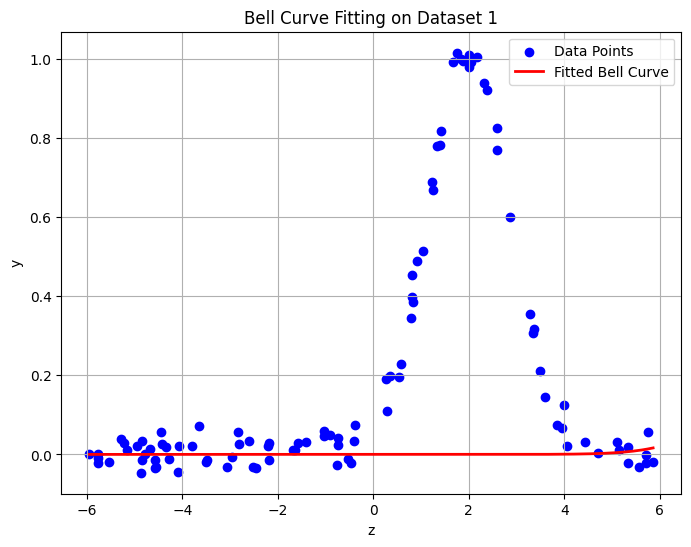

In [8]:
optimal_x = iters_bell[-1]
z_fit = np.linspace(np.min(z_data), np.max(z_data), 200)
m_fit = bell_model(z_fit, optimal_x)

plt.figure(figsize=(8, 6))
plt.scatter(z_data, y_data, color='blue', label='Data Points')
plt.plot(z_fit, m_fit, 'r-', linewidth=2, label='Fitted Bell Curve')
plt.xlabel('z')
plt.ylabel('y')
plt.title('Bell Curve Fitting on Dataset 1')
plt.legend()
plt.grid(True)
plt.show()